# EDA & Preliminary Analysis
---

## Load in our now clean data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.patches import Patch
plt.style.use('fivethirtyeight')

In [2]:
clean_reviews = pd.read_csv('../data/cleaned_all_console_reviews.csv')
clean_reviews.head()

,console,video_game_name,summary,developer,genre(s),num_players,esrb_rating,critic_score,avg_user_score,user_review,user_score
0,ps4,Red Dead Redemption 2,developed by the creators of grand theft auto ...,Rockstar Games,"Action Adventure, Open-World",32,M,97,8.6,this site is a joke this the first time when i...,9
1,ps4,Red Dead Redemption 2,developed by the creators of grand theft auto ...,Rockstar Games,"Action Adventure, Open-World",32,M,97,8.6,fair review of rdr2 im almost <number> finishe...,7
2,ps4,Red Dead Redemption 2,developed by the creators of grand theft auto ...,Rockstar Games,"Action Adventure, Open-World",32,M,97,8.6,i really wanted to love it the overworld is be...,6
3,ps4,Red Dead Redemption 2,developed by the creators of grand theft auto ...,Rockstar Games,"Action Adventure, Open-World",32,M,97,8.6,beautiful graphics excellent voice acting lots...,7
4,ps4,Red Dead Redemption 2,developed by the creators of grand theft auto ...,Rockstar Games,"Action Adventure, Open-World",32,M,97,8.6,this game is really overrated the amazing envi...,7


## Let's go through each column and perform EDA (descriptive statistics and visualizations).

In [3]:
clean_reviews.dtypes

console             object
video_game_name     object
summary             object
developer           object
genre(s)            object
num_players          int64
esrb_rating         object
critic_score         int64
avg_user_score     float64
user_review         object
user_score           int64
dtype: object

## Let's create some functions to help us do our EDA

In [4]:
def descriptive_stats(col):
    if col == 'summary':
            unique_values = clean_reviews[col].unique()[:2]
    elif len(clean_reviews[col].unique()) > 100:
            unique_values = clean_reviews[col].unique()[:50]
    else:
        unique_values = clean_reviews[col].unique()

    print(f'{clean_reviews[col].describe()}\n \
    \n# of Unique values:{clean_reviews[col].nunique()} \
    \n\nUnique values: {unique_values}')
    
    if clean_reviews[col].dtypes != object:
        Q1 = clean_reviews[col].quantile(0.25)
        Q3 = clean_reviews[col].quantile(0.75)

        IQR = Q3 - Q1

        min_boxplot = Q1 - (1.5 * IQR)
        max_boxplot = Q3 + (1.5 * IQR)
        print(f'\nMin of boxplot:{min_boxplot: .2f}\nMax of boxplot: {max_boxplot:.2f}')

In [5]:
def hist_plot(col):
    plt.figure(figsize=(12,8))
    plt.hist(clean_reviews[col], rwidth=5)
    plt.title(col + ' Frequency',
             size=18)
    plt.xlabel(col, size=16)
    plt.ylabel("Frequency", size=16)
    plt.xticks(rotation=0, size=14)

In [6]:
def bar_graph(col):
    plt.figure(figsize=(12,8))
    clean_reviews[col].value_counts().plot(kind='bar');
    plt.title(col + ' count',
                 size=18)
    plt.xlabel(col, size=16)
    plt.ylabel("count", size=16)
    plt.xticks(rotation=45, fontsize=13);

In [7]:
def box_plot(col):
    clean_reviews.boxplot(column=col, figsize=(12,8))
    plt.ylabel(f'{col}', size=16)
    plt.title(col + ' Boxplot',
             size=18)
    Q1 = clean_reviews[col].quantile(0.25)
    Q3 = clean_reviews[col].quantile(0.75)

    IQR = Q3 - Q1

    min_boxplot = Q1 - (1.5 * IQR)
    max_boxplot = Q3 + (1.5 * IQR)
    print(f'\nMin of boxplot:{min_boxplot: .2f}\nMax of boxplot: {max_boxplot:.2f}')

## First let's look at our `avg_user_score` and create our target column (above/below the median avg_user_score)

In [8]:
descriptive_stats('avg_user_score')

count    112345.000000
mean          8.013961
std           1.201614
min           2.000000
25%           7.700000
50%           8.400000
75%           8.800000
max          10.000000
Name: avg_user_score, dtype: float64
     
# of Unique values:63     

Unique values: [ 8.6  8.3  8.5  9.2  9.1  5.7  8.7  8.2  8.8  8.9  7.2  7.9  8.4  7.8
  7.6  9.   8.   7.3  6.4  7.7  7.5  6.9  7.4  6.3  7.   6.6  7.1  6.1
  8.1  6.5  5.2  6.7  6.8  5.9  5.3  5.6  5.8  4.4  6.2  3.4  4.2  4.1
  9.4  3.3  5.   6.   3.8  5.4 10.   5.5  3.6  5.1  3.5  4.8  2.8  4.6
  3.9  4.7  4.5  4.   2.   2.5  2.6]

Min of boxplot: 6.05
Max of boxplot: 10.45


### From our descriptive statistics we can see that our median is an average score of 8.4, we can also see that there are a total of 63 unique average user scores in this data set. From our min box plot value we can see that we have potential outliers below the min of 6.05.

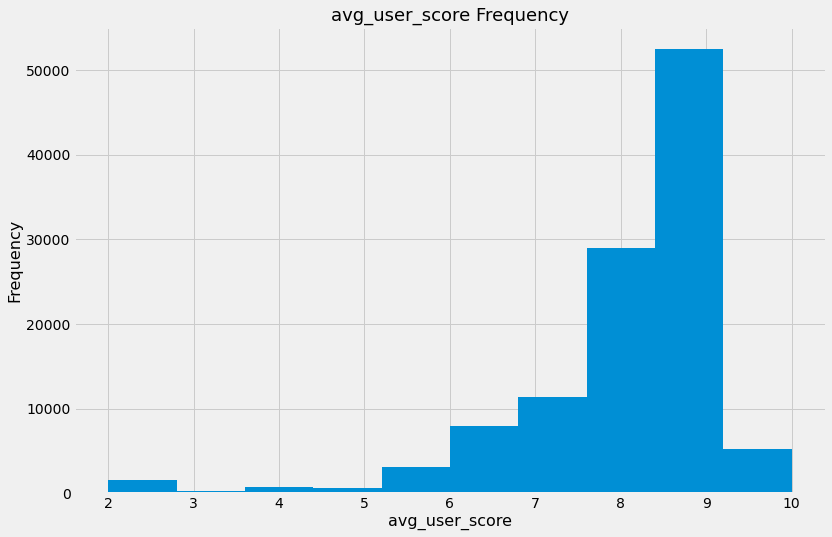

In [9]:
hist_plot('avg_user_score')

### From our historgam above we can see that our data is left skewed due to the outliers below average score of 6 (6.05 from min box plot value). Let's graph a histogram with these values omitted.

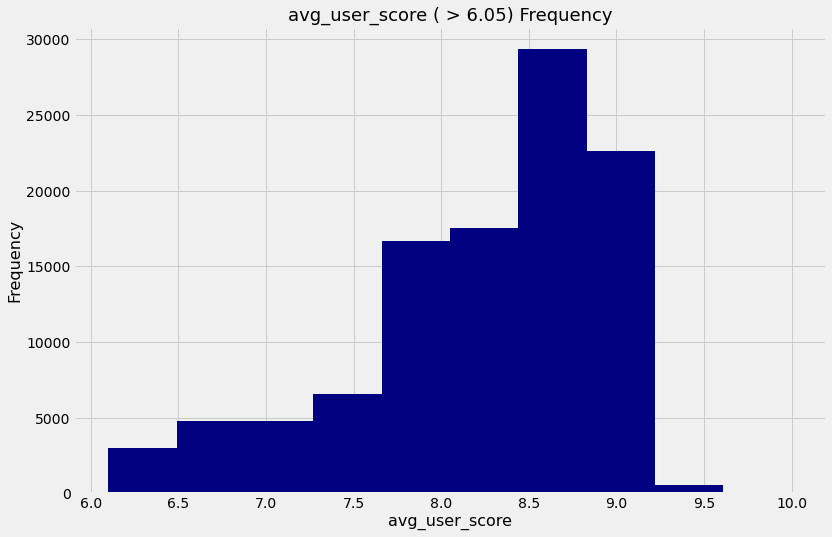

In [10]:
plt.figure(figsize=(12,8))
plt.hist(clean_reviews[clean_reviews['avg_user_score'] > 6.05]['avg_user_score'], rwidth=5, color='navy')
plt.title('avg_user_score ( > 6.05)' + ' Frequency',
         size=18)
plt.xlabel('avg_user_score', size=16)
plt.ylabel("Frequency", size=16)
plt.xticks(rotation=0, size=14);

### Looking at the frequency over average user scores above 6.05 we can still see that our data is still a bit left skewed


Min of boxplot: 6.05
Max of boxplot: 10.45


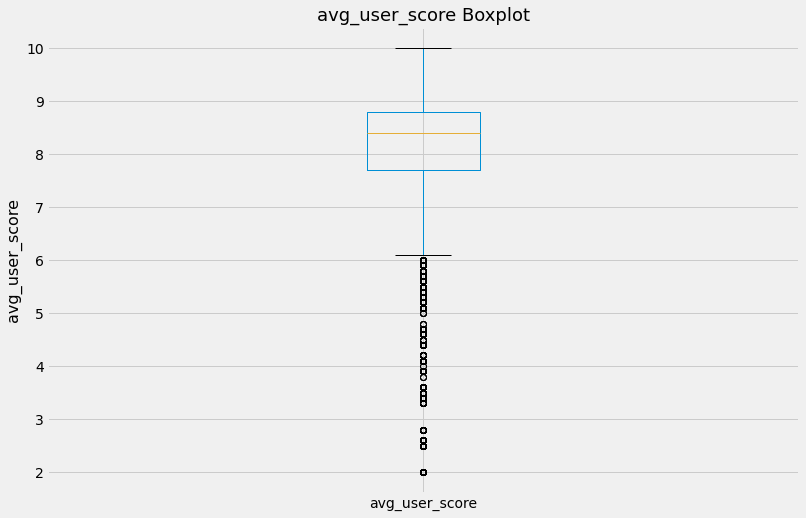

In [11]:
box_plot('avg_user_score')

### Here with the box plot we can more evidently see the outliers present. We can see we have a wider spread of values below the the median with clear outliers below 6.05. Let's continue with our EDA on the dataset and return to these outliers to see if removing them is the best course of action.

In [12]:
clean_reviews[clean_reviews['avg_user_score'] < 6.05]['avg_user_score']

4429      5.7
4430      5.7
4431      5.7
4432      5.7
4433      5.7
         ... 
112340    5.5
112341    5.5
112342    5.5
112343    5.5
112344    5.5
Name: avg_user_score, Length: 6603, dtype: float64

### If we were to remove data with average user score below 6.5 it would be 6,603 rows out of 112,345 rows, or roughly 5.87% of our data. We might also want to consider transforming our data to get a more normalized distribution. Again we will return to this if deemed the best course of action

## Let's create our target column from the `avg_user_score`, 1 for above the median and 0 for below the median

In [13]:
clean_reviews['target'] = (clean_reviews['avg_user_score'] >= \
                           clean_reviews['avg_user_score'].median()).astype(int)
clean_reviews.head(3)

,console,video_game_name,summary,developer,genre(s),num_players,esrb_rating,critic_score,avg_user_score,user_review,user_score,target
0,ps4,Red Dead Redemption 2,developed by the creators of grand theft auto ...,Rockstar Games,"Action Adventure, Open-World",32,M,97,8.6,this site is a joke this the first time when i...,9,1
1,ps4,Red Dead Redemption 2,developed by the creators of grand theft auto ...,Rockstar Games,"Action Adventure, Open-World",32,M,97,8.6,fair review of rdr2 im almost <number> finishe...,7,1
2,ps4,Red Dead Redemption 2,developed by the creators of grand theft auto ...,Rockstar Games,"Action Adventure, Open-World",32,M,97,8.6,i really wanted to love it the overworld is be...,6,1


## Now let's look at our first feature, `console`.

In [14]:
descriptive_stats('console')

count     112345
unique         6
top           pc
freq       32717
Name: console, dtype: object
     
# of Unique values:6     

Unique values: ['ps4' 'xboxone' 'switch' 'pc' 'xbox-series-x' 'ps5']


### From our descriptive stats we can see that we have 6 unique values with 'pc' being the most frequent

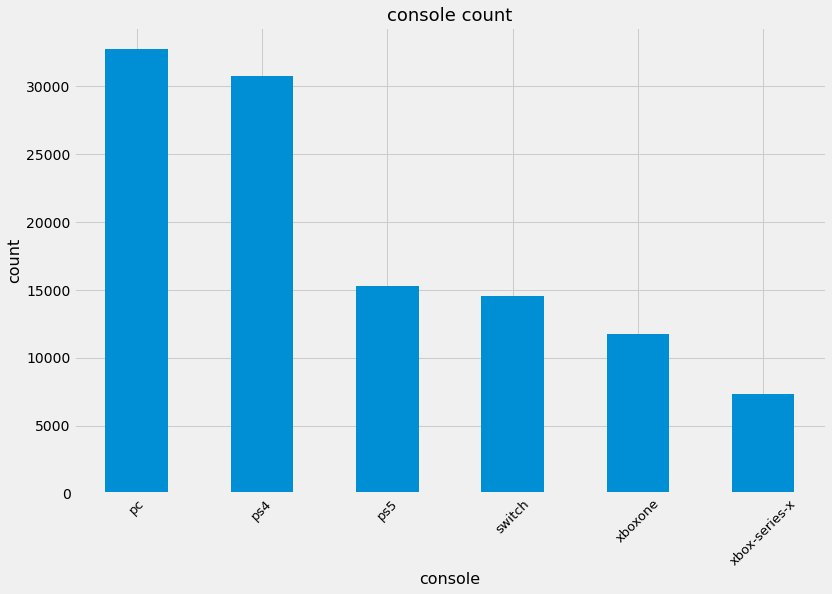

In [15]:
bar_graph('console')

### Looking at our bar graph we can see that we have more reviews for games on pc and ps4 with over 30k for each. Followed by ps5 and switch with each less than 50% of the previous 2, at around 15k reviews. Let's take a look at the distribution of mean average user score based on console.

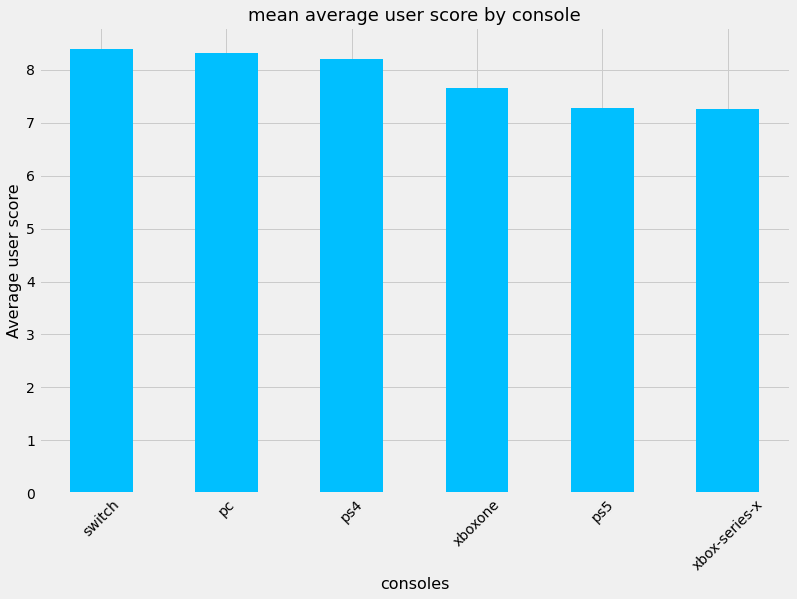

In [16]:
clean_reviews.groupby('console').mean().sort_values('avg_user_score', ascending=False)\
['avg_user_score'].plot(kind='bar', figsize=(12,8), color='deepskyblue')

plt.title('mean average user score by console', fontsize=18)

plt.ylabel('Average user score', fontsize=16)
plt.xlabel('consoles', fontsize=16)

plt.xticks(rotation=45, fontsize=14);

### From our bar chart grouped by console, we can see that all consoles have a mean average user score above 7 with switch, pc, and ps4 having the highest mean average user scores (above 8). Interesting to note that despite the difference in number of reviews for each console, the mean average user scores are all very similar.

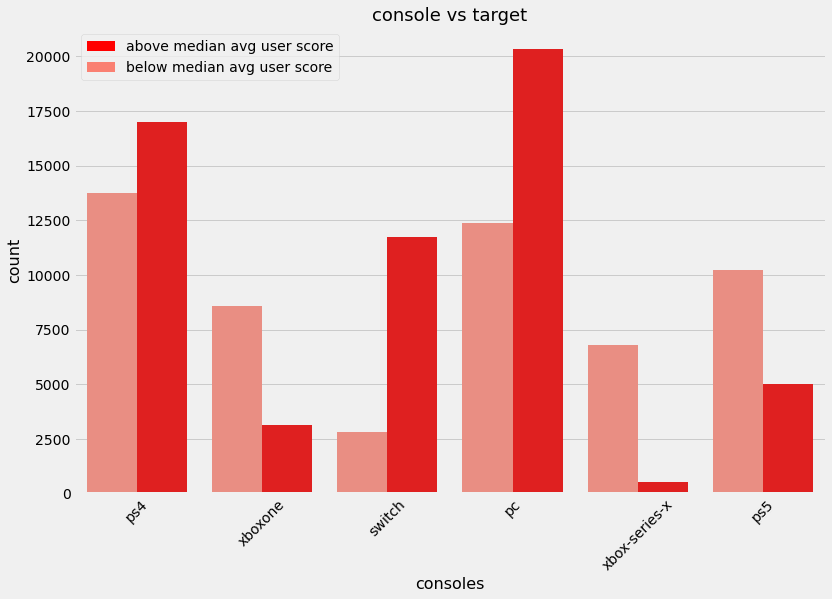

In [17]:
# https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55
# referenced site for grouped bar charts

plt.figure(figsize=(12,8))
sns.countplot(x='console', hue='target', data=clean_reviews, palette={1:'red', 0:'salmon'});

plt.title('console vs target', fontsize=18)

plt.ylabel('count', fontsize=16)
plt.xlabel('consoles', fontsize=16)

color_patches = [
    Patch(facecolor="red", label="above median avg user score"),
    Patch(facecolor="salmon", label="below median avg user score")
]

plt.legend(handles=color_patches)

plt.xticks(rotation=45, fontsize=14);

### In the bar chart above we plotted count of target values for each console. Ps4 reviews are the only ones that have almost an equal amount of reviews above and below the median average user score. Ps4, switch, and pc reviews have more reviews that are above the median average user score. XboxOne, Xbox Series X, and ps5 all have more review below the median average user score. This bar chart provides an interesting view on how different consoles have varying average review scores and in some cases a big disparity between above and below the median average user score. These discrepancies are good to be mindful of moving forward, they could potentially impact our model down the line.

## Let's look at our second feature, `video_game_name`.

In [18]:
descriptive_stats('video_game_name')

count                    112345
unique                      435
top       Red Dead Redemption 2
freq                       2989
Name: video_game_name, dtype: object
     
# of Unique values:435     

Unique values: ['Red Dead Redemption 2' 'Grand Theft Auto V' 'Persona 5 Royal'
 'The Last of Us Remastered' 'God of War' 'The Last of Us Part II'
 'Persona 5' 'Metal Gear Solid V: The Phantom Pain'
 "Uncharted 4: A Thief's End" 'Journey' 'Bloodborne' 'Undertale'
 'The Witcher 3: Wild Hunt'
 'Divinity: Original Sin II - Definitive Edition'
 'Final Fantasy XIV: Shadowbringers' 'Shadow of the Colossus'
 'The Witcher 3: Wild Hunt - Blood and Wine' 'Celeste' 'INSIDE'
 'NieR: Automata - Game of the YoRHa Edition' 'Resident Evil 2'
 'Dragon Quest XI S: Echoes of an Elusive Age - Definitive Edition'
 'flower' 'Diablo III: Ultimate Evil Edition' 'Overwatch' 'Shovel Knight'
 'Rayman Legends' 'Fez' 'Monster Hunter: World'
 'Tales From The Borderlands: Episode 5 - The Vault of the Traveler'
 'The Witc

### From our descriptive stats we can see that there are over 400 unique video games that show up in our data set. Out of those Red Dead Redemption has 2989 reviews making it the most frequent game in our dataset.

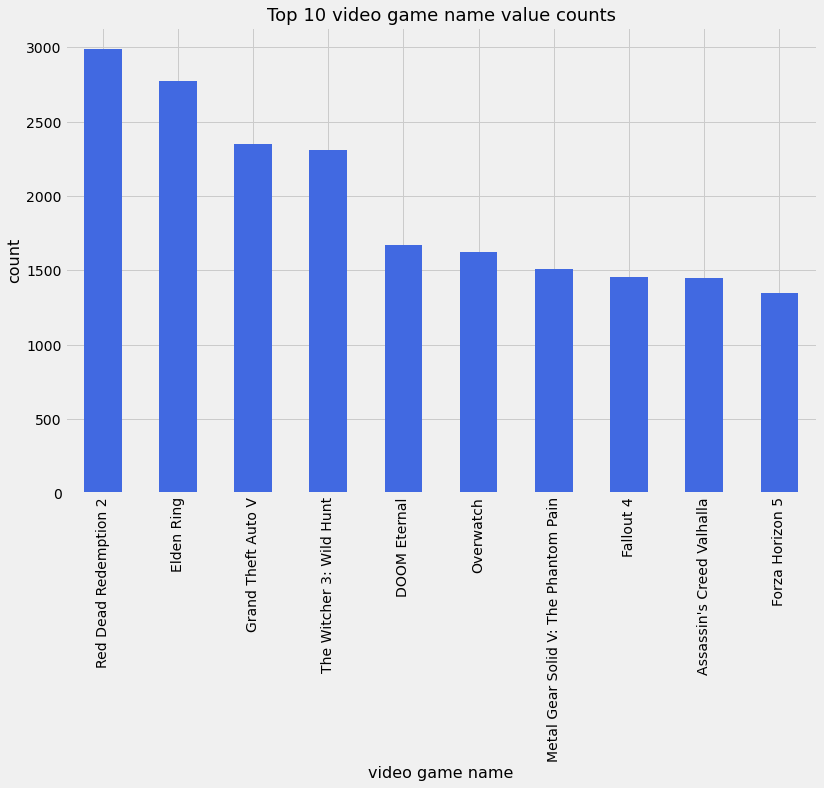

In [19]:
clean_reviews['video_game_name'].value_counts()[:10].plot(kind='bar', figsize=(12,8), color='royalblue')

plt.title('Top 10 video game name value counts', fontsize=18)

plt.ylabel('count', fontsize=16)
plt.xlabel('video game name', fontsize=16)

plt.xticks(fontsize=14);

### Here we see how many times a video game had a review in our dataset. The 4 most frequent are Red Dead Redemption 2, Elden Ring, Grand Theft Auto V, and The Witcher 3: Wild Hunt all of which had over 2000 reviews. When web scraping we capped it at 10 pages of user review, so 1000 reviews per console. The top 4 games must have shown up for more than one console if they have over 1000 reviews.

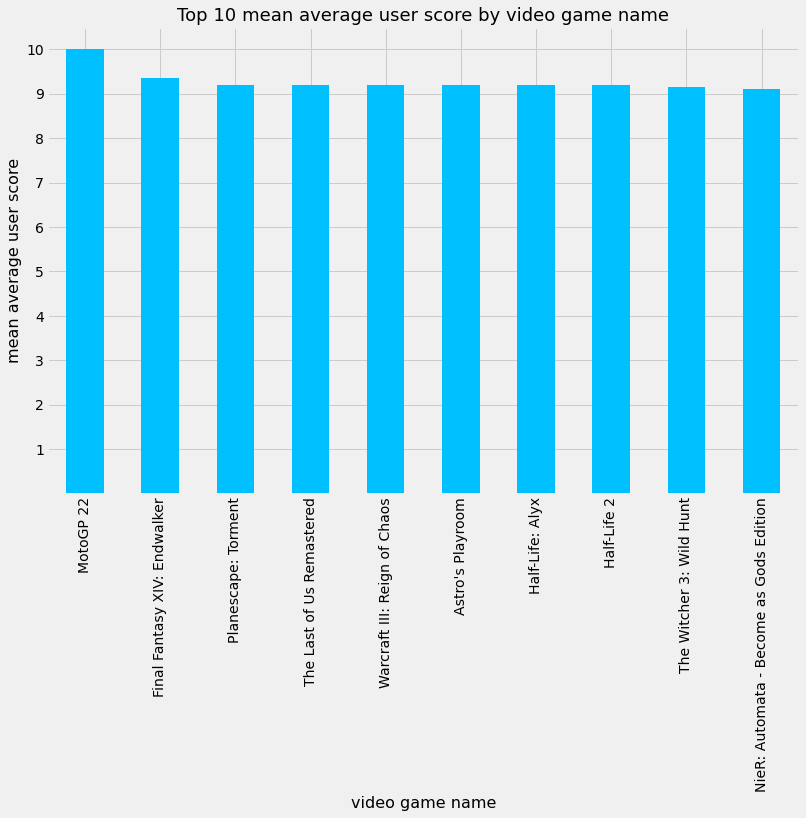

In [20]:
clean_reviews.groupby('video_game_name').mean().sort_values('avg_user_score', ascending=False)\
['avg_user_score'][:10].plot(kind='bar', figsize=(12,8), color='deepskyblue')

plt.title('Top 10 mean average user score by video game name', fontsize=18)

plt.ylabel('mean average user score', fontsize=16)
plt.xlabel('video game name', fontsize=16)
plt.xticks(fontsize=14);
plt.yticks(range(1,11));

In [21]:
top_10_mean_avg_user_score = clean_reviews.groupby('video_game_name').mean().sort_values\
('avg_user_score', ascending=False)['avg_user_score'][:10].index

clean_reviews.loc[clean_reviews['video_game_name'].isin(top_10_mean_avg_user_score)]\
.groupby('video_game_name').count()[['console']].sort_values('console', ascending=False)

,console
video_game_name,
The Witcher 3: Wild Hunt,2308
Half-Life 2,1000
The Last of Us Remastered,900
Half-Life: Alyx,772
Final Fantasy XIV: Endwalker,625
Astro's Playroom,424
Warcraft III: Reign of Chaos,238
Planescape: Torment,163
NieR: Automata - Become as Gods Edition,112


### Looking at the bar chart above it is interesting to note that the only game from our top 10 most frequent that shows up in this plot is The Witcher 3: Wild Hunt. This means that not only were there several reviews for The Witcher 3 but they were also highly rated user reviews. One thing to be cautious about with the above is that some of these games, like MotoGP 22 had very few user reviews, a total of 11. While all the other games on this top 10 list had at least 100 reviews if not more.

In [22]:
top_10_most_frequent_games = clean_reviews['video_game_name'].value_counts()[:10].index

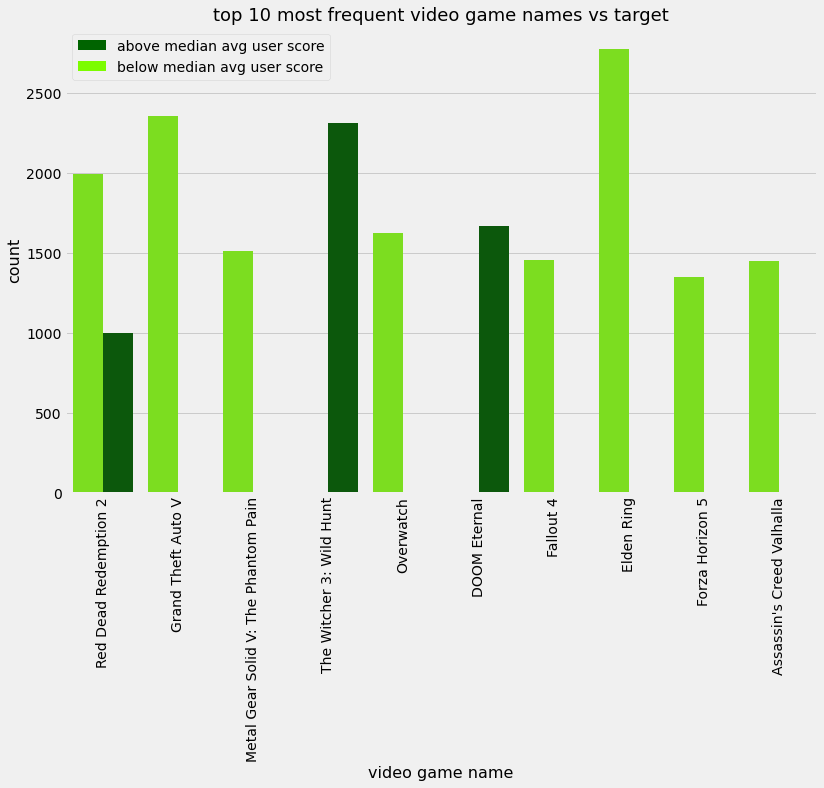

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x='video_game_name', hue='target', 
              data=clean_reviews.loc[clean_reviews['video_game_name']\
                                     .isin(top_10_most_frequent_games)], 
              palette={1:'darkgreen', 0:'lawngreen'});

plt.title('top 10 most frequent video game names vs target', fontsize=18)

plt.ylabel('count', fontsize=16)
plt.xlabel('video game name', fontsize=16)

color_patches = [
    Patch(facecolor="darkgreen", label="above median avg user score"),
    Patch(facecolor="lawngreen", label="below median avg user score")
]

plt.legend(handles=color_patches)

plt.xticks(rotation=90, fontsize=14);

### Interesting to see that the top 10 most frequent only had 3 that were above the median avg user score. Red Dead Redemption 2 is interesting to see that it has both above/below the median. This most likely indicates that on one console the user reviews were above the median while on another they were below. This can happen when developers make a subpar port to a console, usually pc, which leads to bad reviews.

In [24]:
# DELETE THIS LATER BUT THINK ABOUT WHAT THE TARGET VARIABLE SHOULD REPRESENT
# Currently the target is the median avg_user_score for ALL the reviews. BUT there are some games with a lot
    # of reviews which skews the median. 
# The way shown below groups ALL the video games together, then looks at the mean avg_user_score THEN finds
    # the median value of that. NEED GUIDANCE ON WHAT IS RIGHT. 
# Below is the median for ALL 435 video games in the dataset. So roughly 217 video games are above/below the med
    # of 8 BUT that does not mean that 50% of ALL the reviews in this dataset are going to be above/below THIS med val
clean_reviews.groupby('video_game_name').describe()['avg_user_score']['mean'].describe()

# Changed target to be >= 8 and it created a class imbalance, 1 - 74108, 0 - 38237
# compared to the original which was 1- 57740, 0 - 54605. NEED GUIDANCE
# MAYBE change target to above/below med critic score?????? OR median regular user score????

count    435.000000
mean       7.662316
std        1.213293
min        2.000000
25%        7.200000
50%        8.000000
75%        8.500000
max       10.000000
Name: mean, dtype: float64

In [25]:
# DELETE LATER
clean_reviews[clean_reviews['target'] == 0].groupby('video_game_name').count().sort_values('console', ascending=False)

,console,summary,developer,genre(s),num_players,esrb_rating,critic_score,avg_user_score,user_review,user_score,target
video_game_name,,,,,,,,,,,
Elden Ring,2773,2773,2773,2773,2773,2773,2773,2773,2772,2773,2773
Grand Theft Auto V,2351,2351,2351,2351,2351,2351,2351,2351,2348,2351,2351
Red Dead Redemption 2,1989,1989,1989,1989,1989,1989,1989,1989,1986,1989,1989
Overwatch,1623,1623,1623,1623,1623,1623,1623,1623,1623,1623,1623
Metal Gear Solid V: The Phantom Pain,1510,1510,1510,1510,1510,1510,1510,1510,1509,1510,1510
...,...,...,...,...,...,...,...,...,...,...,...
Samurai Shodown: Special Edition,2,2,2,2,2,2,2,2,2,2,2
Lawn Mowing Simulator,2,2,2,2,2,2,2,2,2,2,2
Assassin's Creed Valhalla: Dawn of Ragnarok,2,2,2,2,2,2,2,2,2,2,2


## Let's look at our, `developer` feature.

In [26]:
descriptive_stats('developer')

count            112345
unique              257
top       From Software
freq               6816
Name: developer, dtype: object
     
# of Unique values:257     

Unique values: ['Rockstar Games' 'Rockstar North' 'Atlus' 'Naughty Dog'
 'SCE Santa Monica' 'Kojima Productions' 'Tricky Pixels' 'From Software'
 'tobyfox' 'CD Projekt Red Studio' 'Larian Studios Games' 'Square Enix'
 'Bluepoint Games' 'Matt Makes Games Inc.' 'PLAYDEAD' 'PlatinumGames'
 'Capcom R&D Division 1' 'Blizzard Entertainment' 'Yacht Club Games'
 'Ubisoft Montpellier' 'Polytron Corp.' 'Capcom' 'Telltale Games'
 'JapanStudio' 'Q Entertainment' 'Respawn Entertainment' 'Enhance Games'
 'Hazelight' 'Supergiant Games' 'Media Molecule' 'BioWare'
 'Vicarious Visions' 'EA DICE' 'Guerrilla' '4J Studios' 'Giant Sparrow'
 'Nicalis' 'Crystal Dynamics' 'Visual Concepts' 'Arkane Studios'
 'NetherRealm Studios' 'Mega Crit Games' 'BlitWorks' 'Steel Crate Games'
 'Croteam' 'Cloudhead Games' 'Housemarque' 'Team Ninja'
 'Cardboard Comput

### 

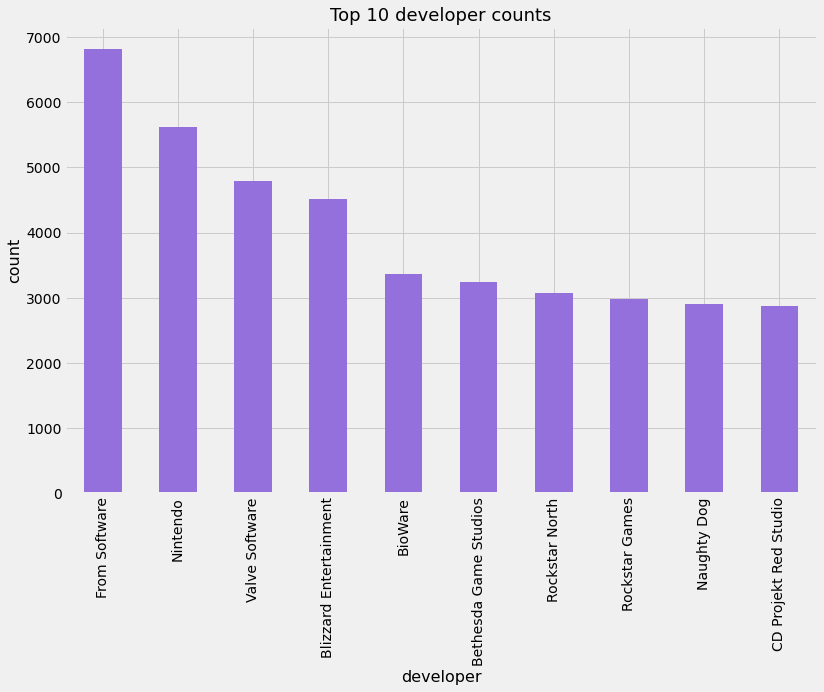

In [27]:
clean_reviews['developer'].value_counts()[:10].plot(kind='bar', figsize=(12,8), color='mediumpurple')

plt.title('Top 10 developer counts', fontsize=18)

plt.ylabel('count', fontsize=16)
plt.xlabel('developer', fontsize=16)

plt.xticks(fontsize=14);

###

In [28]:
clean_reviews[clean_reviews['developer'] == 'From Software'].groupby('video_game_name').count()

,console,summary,developer,genre(s),num_players,esrb_rating,critic_score,avg_user_score,user_review,user_score,target
video_game_name,,,,,,,,,,,
Bloodborne,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Bloodborne: The Old Hunters,156,156,156,156,156,156,156,156,156,156,156
Dark Souls II,539,539,539,539,539,539,539,539,539,539,539
Dark Souls II: Scholar of the First Sin,255,255,255,255,255,255,255,255,255,255,255
Dark Souls III,789,789,789,789,789,789,789,789,788,789,789
Dark Souls Remastered,42,42,42,42,42,42,42,42,41,42,42
Elden Ring,2773,2773,2773,2773,2773,2773,2773,2773,2772,2773,2773
Sekiro: Shadows Die Twice,1262,1262,1262,1262,1262,1262,1262,1262,1261,1262,1262


In [29]:
clean_reviews['user_score'].describe()

count    112345.000000
mean          7.823704
std           3.249963
min           0.000000
25%           7.000000
50%           9.000000
75%          10.000000
max          10.000000
Name: user_score, dtype: float64